# Обзор модуля `astropy.table`

Модуль `astropy.table` предоставляет гибкую среду для работы со структуированными астрономическими таблицами. В отличие от `pandas`, широко используемом при анализе данных, `astropy.table` специально разработан под нужды астрономии и бесшовно интегрируется с остальной экосистемой `astropy`.

Основная структура `astropy.table.Table`, в отличие от `pandas.DataFrame`, оптимизирована под научные нужды:

- Встроенная поддержка единиц измерения `astropy.units`
- Родная поддержка астрономических форматов данных **FITS**, **ECSV**, **VOTable**, и других
- Простое использование колоночных метаданных (единицы измерения, описания, форматы, маски)
- Полная совместимость с `SkyCoord`, `Time`, и другими объектами Astropy
- Точный контроль формата ввода и вывода данных
- Интеграция с `astroquery`, `astropy.io` и графопостроителями

Тем самым `astropy.table` подчеркивает научную прозрачность, воспроизводимость и учет единиц измерения, — все необходимое для надежных астрономических вычислений.

---

## Место в экосистеме Astropy

Также, как `astropy.units` необходим для надежности в размерных вычислениях, `astropy.table` необходим для обработки, организации и анализа астрономических датасетов. В Astropy он появляется:

- Как выходной формат запросов из онлайн-каталогов (например, через `astroquery`)
- Как результат чтения данных типа **FITS** и **ASCII**
- При манипуляциях с журналами наблюдений и результатами симуляций
- Как структура данных, передаваемая в функции построения графиков и моделей

---

В этом ноутбуке разберем структуру, создание, преобразование и возможности ввода и вывода у `astropy.table.Table`.

In [148]:
from astropy.table import QTable, Table
import astropy.units as u
import numpy as np

star_names = np.array(["Proxima Centauri", "Alpha Centauri A", "Barnard's Star", "Wolf 359", "Luyten 726-8A"])
distances = np.array([4.24, 4.37, 5.96, 7.86, 8.73]) * u.lyr
apparent_mags = np.array([11.13, -0.01, 9.54, 13.5, 12.6]) * u.mag
absolute_mags = np.array([15.5, 4.38, 13.2, 16.6, 15.0]) * u.mag
temperatures = np.array([3042, 5790, 3134, 2800, 2650]) * u.K
radii = np.array([0.14, 1.22, 0.18, 0.16, 0.12]) * u.R_sun
spectral_types = np.array(["M5.5Ve", "G2V", "M4.0Ve", "M6.0Ve", "M5.5Ve"])

stars_table = QTable(
    [star_names, distances, apparent_mags, absolute_mags, temperatures, radii, spectral_types],
    names=["Star", "Distance", "App_Mag", "Abs_Mag", "Temperature", "Radius", "Spectral_Type"])

stars_table

Star,Distance,App_Mag,Abs_Mag,Temperature,Radius,Spectral_Type
,lyr,mag,mag,K,solRad,
str16,float64,float64,float64,float64,float64,str6
Proxima Centauri,4.24,11.13,15.5,3042.0,0.14,M5.5Ve
Alpha Centauri A,4.37,-0.01,4.38,5790.0,1.22,G2V
Barnard's Star,5.96,9.54,13.2,3134.0,0.18,M4.0Ve
Wolf 359,7.86,13.5,16.6,2800.0,0.16,M6.0Ve
Luyten 726-8A,8.73,12.6,15.0,2650.0,0.12,M5.5Ve


### Описание создания таблиц

В ячейке выше мы создали таблицу с поддерживаемыми единицами измерения `QTable` из массивов Numpy:

- Переменная `star_names` содержит имена 5 ближайших звезд (в виде списка строк).
- `distances` содержит их расстояние от Земли в световых годах, с единицами из `astropy.units`.
- `apparent_mags` и `absolute_mags` содержат видимую и абсолютную звездную величину звезд.
- `temperatures` содержит эффективную температуру в кельвинах.
- `radii` содержит радиусы звезд в радиусах Солнца (`R_sun`).
- `spectral_types` содержит спектральные классы звезд.

In [64]:
print(stars_table) # print() выводит ascii-форматированную таблицу с заголовком из имени и единицы измерения

      Star       Distance App_Mag Abs_Mag Temperature Radius Spectral_Type
                   lyr      mag     mag        K      solRad              
---------------- -------- ------- ------- ----------- ------ -------------
Proxima Centauri     4.24   11.13    15.5      3042.0   0.14        M5.5Ve
Alpha Centauri A     4.37   -0.01    4.38      5790.0   1.22           G2V
  Barnard's Star     5.96    9.54    13.2      3134.0   0.18        M4.0Ve
        Wolf 359     7.86    13.5    16.6      2800.0   0.16        M6.0Ve
   Luyten 726-8A     8.73    12.6    15.0      2650.0   0.12        M5.5Ve


In [65]:
stars_table.colnames # список из названий колонок

['Star',
 'Distance',
 'App_Mag',
 'Abs_Mag',
 'Temperature',
 'Radius',
 'Spectral_Type']

In [66]:
stars_table.info # общая информация про колонки в таблице

<QTable length=5>
     name      dtype   unit   class  
------------- ------- ------ --------
         Star   str16          Column
     Distance float64    lyr Quantity
      App_Mag float64    mag Quantity
      Abs_Mag float64    mag Quantity
  Temperature float64      K Quantity
       Radius float64 solRad Quantity
Spectral_Type    str6          Column

In [67]:
stars_table['Temperature'].info.format = '5.0f' # с помощью .info.format можно задать формат вывода таблицы через print и сохранения в файл
print(stars_table)

      Star       Distance App_Mag Abs_Mag Temperature Radius Spectral_Type
                   lyr      mag     mag        K      solRad              
---------------- -------- ------- ------- ----------- ------ -------------
Proxima Centauri     4.24   11.13    15.5        3042   0.14        M5.5Ve
Alpha Centauri A     4.37   -0.01    4.38        5790   1.22           G2V
  Barnard's Star     5.96    9.54    13.2        3134   0.18        M4.0Ve
        Wolf 359     7.86    13.5    16.6        2800   0.16        M6.0Ve
   Luyten 726-8A     8.73    12.6    15.0        2650   0.12        M5.5Ve


In [68]:
stars_table.info # добавился format!

<QTable length=5>
     name      dtype   unit  format  class  
------------- ------- ------ ------ --------
         Star   str16                 Column
     Distance float64    lyr        Quantity
      App_Mag float64    mag        Quantity
      Abs_Mag float64    mag        Quantity
  Temperature float64      K   5.0f Quantity
       Radius float64 solRad        Quantity
Spectral_Type    str6                 Column

In [69]:
print(type(stars_table['Temperature']))

<class 'astropy.units.quantity.Quantity'>


In [70]:
print(stars_table['Temperature']) # вывести колонку
print(stars_table['Temperature'][0]) # вывести первую строку колонки
print(stars_table[0]['Temperature']) # вывести колонку Temperature у первой строки

[3042. 5790. 3134. 2800. 2650.] K
3042.0 K
3042.0 K


In [71]:
print(stars_table['Temperature'].value)   # вытащить значение
print(type(stars_table['Temperature'].value))

[3042. 5790. 3134. 2800. 2650.]
<class 'numpy.ndarray'>


И `stars_table['col'][row]`, и `stars_table[row]['col']` позволяют обратиться к конкретной ячейке, однако вторая форма (`table[row]['col']`) полезна для доступа к нескольким колонкам одной строки через срезы:

In [72]:
print(stars_table[0:2])

      Star       Distance App_Mag Abs_Mag Temperature Radius Spectral_Type
                   lyr      mag     mag        K      solRad              
---------------- -------- ------- ------- ----------- ------ -------------
Proxima Centauri     4.24   11.13    15.5        3042   0.14        M5.5Ve
Alpha Centauri A     4.37   -0.01    4.38        5790   1.22           G2V


In [73]:
print(stars_table['Temperature','Distance']) 

Temperature Distance
     K        lyr   
----------- --------
       3042     4.24
       5790     4.37
       3134     5.96
       2800     7.86
       2650     8.73


In [74]:
print(stars_table['Temperature'].unit)

K


### Создание новой колонки

Сосчитаем новую колонку по закону Стефана-Больцмана:

\\[
L = 4\pi R^2 \sigma T^4
\\]

Пользуясь `astropy.constants` и `astropy.units`, мы гарантируем сохранность единиц измерения. Это не только упрощает вычисления, но и убирает ошибки размерностей.

In [75]:
from astropy.constants import sigma_sb

R = stars_table['Radius'] 
T = stars_table['Temperature']

luminosity = 4 * np.pi * R**2 * sigma_sb * T**4

После подсчитывания, переведем светимости в солнечные и запишем в колонку `Luminosity` в таблице `stars_table`:

In [77]:
luminosities_Lsun = luminosity.to(u.L_sun)

stars_table['Luminosity'] = luminosities_Lsun  # добавляем новую колонку
stars_table

Star,Distance,App_Mag,Abs_Mag,Temperature,Radius,Spectral_Type,Luminosity
,lyr,mag,mag,K,solRad,,solLum
str16,float64,float64,float64,float64,float64,str6,float64
Proxima Centauri,4.24,11.13,15.5,3042,0.14,M5.5Ve,0.0015121211520600123
Alpha Centauri A,4.37,-0.01,4.38,5790,1.22,G2V,1.5070497682487838
Barnard's Star,5.96,9.54,13.2,3134,0.18,M4.0Ve,0.0028160130105810885
Wolf 359,7.86,13.5,16.6,2800,0.16,M6.0Ve,0.0014176393805220048
Luyten 726-8A,8.73,12.6,15.0,2650,0.12,M5.5Ve,0.0006397932680773995


Чтобы убрать лишние знаки после запятой, зададим форматирование новой колонки:

In [78]:
stars_table['Luminosity'].info.format = '5.4f'
stars_table

Star,Distance,App_Mag,Abs_Mag,Temperature,Radius,Spectral_Type,Luminosity
,lyr,mag,mag,K,solRad,,solLum
str16,float64,float64,float64,float64,float64,str6,float64
Proxima Centauri,4.24,11.13,15.5,3042,0.14,M5.5Ve,0.0015
Alpha Centauri A,4.37,-0.01,4.38,5790,1.22,G2V,1.5070
Barnard's Star,5.96,9.54,13.2,3134,0.18,M4.0Ve,0.0028
Wolf 359,7.86,13.5,16.6,2800,0.16,M6.0Ve,0.0014
Luyten 726-8A,8.73,12.6,15.0,2650,0.12,M5.5Ve,0.0006


Именно такое же форматирование сохранится, если записать таблицу в файл с помощью метода `write("filename")`:

In [19]:
stars_table.write("test_table_4.csv")
stars_table['Luminosity'].info.format = '5.5f'
stars_table.write("test_table_5.csv")

Чтение сохраненных таблиц в большинстве распространенных форматов осуществляется методом `read`:

In [22]:
stars = QTable.read("test_table_4.csv")
stars

Star,Distance,App_Mag,Abs_Mag,Temperature,Radius,Spectral_Type,Luminosity
str16,float64,float64,float64,int64,float64,str6,float64
Proxima Centauri,4.24,11.13,15.5,3042,0.14,M5.5Ve,0.0015
Alpha Centauri A,4.37,-0.01,4.38,5790,1.22,G2V,1.507
Barnard's Star,5.96,9.54,13.2,3134,0.18,M4.0Ve,0.0028
Wolf 359,7.86,13.5,16.6,2800,0.16,M6.0Ve,0.0014
Luyten 726-8A,8.73,12.6,15.0,2650,0.12,M5.5Ve,0.0006


In [79]:
# здесь можно прочитать про все доступные для чтения/записи форматы
QTable.read.help()

QTable.read general documentation

Read and parse a data table and return as a Table.

This function provides the Table interface to the astropy unified I/O
layer.  This allows easily reading a file in many supported data formats
using syntax such as::

  >>> from astropy.table import Table
  >>> dat = Table.read('table.dat', format='ascii')
  >>> events = Table.read('events.fits', format='fits')

Get help on the available readers for ``Table`` using the``help()`` method::

  >>> Table.read.help()  # Get help reading Table and list supported formats
  >>> Table.read.help('fits')  # Get detailed help on Table FITS reader
  >>> Table.read.list_formats()  # Print list of available formats

See also: https://docs.astropy.org/en/stable/io/unified.html

Parameters
----------
*args : tuple, optional
    Positional arguments passed through to data reader. If supplied the
    first argument is typically the input filename.
format : str
    File format specifier.
units : list, dict, optional
   

## Общие принципы редактирования таблиц

Создадим таблицу из четырех колонок разных типов и посмотрим на её редактирование. Общие принципы совпадают с такими же в `pandas` и `numpy`:

In [26]:
a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5]
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
           names=('a', 'b', 'c', 'd'),
           meta={'name': 'first table'})
t

a,b,c,d
,,,m / s
int32,float64,str1,float64
1,2.0,x,10.0
4,5.0,y,20.0
5,8.5,z,30.0


In [27]:
t['a'][:] = [-1, -2, -3]    # задать значения "на месте" (должен быть тот же самый тип!)
t['a'][2] = 30               # задать строку 2 колонки 'a'
t[1] = (8, 9.0, "W", 4 * u.m / u.s) # задать все значения строки 1
t[1]['b'] = -9              # задать колонку 'b' строки 1
t[0:2]['b'] = 100.0         # задать колонки 'b' строк 0 и 1
t

a,b,c,d
,,,m / s
int32,float64,str1,float64
-1,100.0,x,10.0
8,100.0,W,4.0
30,8.5,z,30.0


Колонки можно заменять, добавлять, удалять и переименовывать следующим образом:

In [28]:
t['b'] = ['a', 'new', 'dtype']   # заменить колонку 'b' (можно на другой тип)
t['e'] = [1, 2, 3]               # добавить колонку 'e'
del t['c']                       # удалить колонку 'c'
t.rename_column('a', 'A')        # Переименовать колонку 'a' в 'A'
t.colnames

['A', 'b', 'd', 'e']

In [29]:
t

A,b,d,e
,,m / s,
int32,str5,float64,int64
-1,a,10.0,1
8,new,4.0,2
30,dtype,30.0,3


Новую строку можно добавлять вот так. Обратите внимание, что 10 см/c автоматически переведутся в нужные единицы (м/с)

In [30]:
t.add_row([-8, 'string', 10 * u.cm / u.s, 10])
t['d']

<Quantity [10. ,  4. , 30. ,  0.1] m / s>

## Отличия Table и QTable

Каталоги ниже будут загружены в виде типа данных `astropy.table.Table`, который практически идентичен `QTable`. Исключение заключается в том, что колонки в `Table` являются специфическими массивами типа `Table.columns`, а не типом `Quantity`. Это сделано для того, чтобы обращение к конкретной ячейке возвращало безразмерный объект. Из-за этого при некоторых размерных преобразованиях может возникнуть путаница в единицах. В случае сомнений при работе с размерными единицами в `Table`, добавьте `.quantity` в название колонки.

In [21]:
data = [[30, 90]]

t = Table(data, names=('angle',))
t['angle'].unit = 'deg'
np.sin(t['angle']) # синус воспринял градусы в радианах, несмотря на единицу

-0.9880316240928618
0.8939966636005579


In [20]:
np.sin(t['angle'].quantity)

<Quantity [0.5, 1. ]>

In [22]:
t = QTable(data, names=('angle',))
t['angle'].unit = 'deg'
np.sin(t['angle']) # с QTable каждая колонка уже Quantity

<Quantity [0.5, 1. ]>

## Загрузка данных с помощью `astroquery` и `Vizier`

Библиотека `astroquery` позволяет обращаться к таким базам астрономических данных, как [SIMBAD](http://simbad.cds.unistra.fr/simbad/) и [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR), и загружать информацию о конкретном объекте, или данные каталога целиком, или (что более актуально для огромных каталогов) конкретную область каталога, заданную по координатам её центра. Полученный объект имеет тип `astropy.table.Table` и обрабатывается аналогично процедуре выше.

In [56]:
from astroquery.vizier import Vizier
import astropy.coordinates as coord
import astropy.units as u
help(Vizier) # большая справка по методу. Где-то может обманывать, требуется эксперимент

Help on VizierClass in module astroquery.vizier.core object:

class VizierClass(astroquery.query.BaseQuery)
 |  VizierClass(
 |      *,
 |      columns=['*'],
 |      column_filters={},
 |      catalog=None,
 |      keywords=None,
 |      ucd='',
 |      timeout=60,
 |      vizier_server='vizier.cds.unistra.fr',
 |      row_limit=50
 |  )
 |
 |  Method resolution order:
 |      VizierClass
 |      astroquery.query.BaseQuery
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      *,
 |      columns=['*'],
 |      column_filters={},
 |      catalog=None,
 |      keywords=None,
 |      ucd='',
 |      timeout=60,
 |      vizier_server='vizier.cds.unistra.fr',
 |      row_limit=50
 |  )
 |      Parameters
 |      ----------
 |      columns : list
 |          List of strings
 |      column_filters : dict
 |      catalog : str or None
 |      keywords : str or None
 |      ucd : string
 |          "Unified Content Description" column descriptions.  Specify

In [49]:
# найдем с помощью объекта SkyCoord координаты Сириуса в ICRS по имени
alphaCMa = coord.SkyCoord.from_name("Sirius")
alphaCMa

<SkyCoord (ICRS): (ra, dec) in deg
    (101.28715533, -16.71611586)>

In [151]:
# так можно поискать каталоги по ключевым словам через пробел
catalog_list = Vizier.find_catalogs('Variable Catalogue')
for k, v in catalog_list.items():
    print(k, ":", v.description)

I/280B : All-sky Compiled Catalogue of 2.5 million stars (Kharchenko+ 2009)
II/139B : General Catalog of Variable Stars, 4th Ed. (GCVS4) (Kholopov+ 1988)
II/140 : New Catalogue of Suspected Variable Stars (Kukarkin+, 1982)
II/171 : Parenago Catalog of Stars in Orion Nebula (Parenago 1954)
II/172B : General Catalogue of Variable Stars V1.1, Vol. IV (Durlevich+ 1996)
II/188 : Long-term photometry of Variables II (Sterken+, 1993)
II/200 : Long-term photometry of Variables III (Manfroid+, 1995)
II/202 : Long-term photometry of Variables IV (Sterken+, 1995)
II/205 : GCVS, Vol. V.: Extragalactic Variable Stars (Artyukhina+ 1996)
II/214A : Combined General Catalogue of Variable Stars (Kholopov+ 1998)
II/219 : New Catalogue of Suspected Variable Stars Supplement (Kazarovets+ 1998)
II/250 : Combined General Catalogue of Variable Stars (Samus+ 2004)
II/337 : VISTA Variables in the Via Lactea Survey DR1 (Saito+, 2012)
II/348 : VISTA Variable in the Via Lactea Survey DR2 (Minniti+, 2017)
II/366 : 

In [114]:
# Загрузим Общий Каталог Переменных Звезд (ОКПЗ) 2017 года
result = Vizier().get_catalogs(catalog="B/gcvs")
result[0]

GCVS,n_GCVS,RAJ2000,DEJ2000,VarType,magMax,Period,SpType,Exists,VarName,Simbad
,,,,,mag,d,,,,
str10,str1,str11,str11,str10,float32,float64,str17,str12,str11,str6
T And,x,00 22 23.15,+26 59 45.8,M,7.700,281.0000000000,M4e-M7.5e,,T And,Simbad
U And,x,01 15 29.70,+40 43 08.4,M,9.000,347.7000000000,M6e,,U And,Simbad
V And,x,00 50 06.28,+35 39 10.1,M,9.000,256.4000000000,M2e-M3e,,V And,Simbad
W And,*,02 17 32.96,+44 18 17.8,M,6.700,397.3000000000,"S6,1e-S9,2e",,W And,Simbad
X And,x,00 16 09.53,+47 00 45.3,M,8.500,343.4000000000,"S2,9e-S5,5e",,X And,Simbad
Y And,x,01 39 36.91,+39 20 34.7,M,8.200,220.5000000000,M3e-M4.5e,,Y And,Simbad
Z And,*,23 33 39.95,+48 49 05.9,ZAND,7.700,--,M2III+B1eq,,Z And,Simbad
RR And,x,00 51 23.32,+34 22 36.8,M,8.400,330.6000000000,"S6.5,2e",,RR And,Simbad


## **!ВНИМАНИЕ!** ячейка ниже загружает порядка ~10 МБ табличных данных

In [113]:
# Загрузим ВЕСЬ Общий Каталог Переменных Звезд (ОКПЗ) 2017 года
result = Vizier(row_limit=-1,).get_catalogs(catalog="B/gcvs")
result[0]

GCVS,n_GCVS,RAJ2000,DEJ2000,VarType,magMax,Period,SpType,Exists,VarName,Simbad
,,,,,mag,d,,,,
str10,str1,str11,str11,str10,float32,float64,str17,str12,str11,str6
T And,x,00 22 23.15,+26 59 45.8,M,7.700,281.0000000000,M4e-M7.5e,,T And,Simbad
U And,x,01 15 29.70,+40 43 08.4,M,9.000,347.7000000000,M6e,,U And,Simbad
V And,x,00 50 06.28,+35 39 10.1,M,9.000,256.4000000000,M2e-M3e,,V And,Simbad
W And,*,02 17 32.96,+44 18 17.8,M,6.700,397.3000000000,"S6,1e-S9,2e",,W And,Simbad
X And,x,00 16 09.53,+47 00 45.3,M,8.500,343.4000000000,"S2,9e-S5,5e",,X And,Simbad
Y And,x,01 39 36.91,+39 20 34.7,M,8.200,220.5000000000,M3e-M4.5e,,Y And,Simbad
Z And,*,23 33 39.95,+48 49 05.9,ZAND,7.700,--,M2III+B1eq,,Z And,Simbad
RR And,x,00 51 23.32,+34 22 36.8,M,8.400,330.6000000000,"S6.5,2e",,RR And,Simbad


In [115]:
# Загрузим переменные звезды из каталога ОКПЗ B/gcvs возле Сириуса в квадратной области 5x5 градусов с периодами меньше 100 дней
result = Vizier(row_limit=-1, column_filters={"Period": "< 100"}).query_region(coordinates=alphaCMa, width="5deg", catalog="B/gcvs")
result[0] # смотрим на первую и единственную таблицу в списке таблиц

GCVS,n_GCVS,RAJ2000,DEJ2000,VarType,magMax,Period,SpType,Exists,VarName,Simbad
,,,,,mag,d,,,,
str10,str1,str11,str11,str10,float32,float64,str17,str12,str11,str6
EI CMa,x,06 35 29.42,-17 55 19.8,EA,12.470,10.6102000000,,,EI CMa,Simbad
EQ CMa,x,06 48 51.62,-16 18 03.7,EA,12.200,2.2915010000,,,EQ CMa,Simbad
HL CMa,*,06 45 17.22,-16 51 34.7,UGSS,10.500,15.0000000000,pec(UG),,HL CMa,Simbad
V0372 CMa,x,06 43 14.21,-15 56 11.6,SRB,10.200,86.0000000000,M7,,V0372 CMa,Simbad
V0374 CMa,x,06 51 23.16,-16 14 55.7,SRB,10.200,73.0000000000,C,,V0374 CMa,Simbad
V0377 CMa,*,06 55 16.07,-17 12 55.0,EA,7.880,3.0135100000,B8III,,V0377 CMa,Simbad
V0430 CMa,x,06 39 35.62,-15 59 47.8,EW,13.200,0.3205970000,,,V0430 CMa,Simbad
V0431 CMa,x,06 48 19.14,-15 06 10.3,EA,13.300,1.1616500000,,,V0431 CMa,Simbad


Мы передали в качестве аргументов при инициализации класса Vizier `row_limit=-1` для того, чтобы убрать ограничения по количеству загружаемых строк (по-умолчанию их загружается не более 50), и `column_filters` - словарь, опциональный аргумент, задает фильтр на колонки, содержит название колонки как ключ, и ограничивающее условие как значение.

Метод `.get_catalogs(catalog='X')` позволяет полностью загрузить каталог, в нашем случае `X` — это `B/gcvs`

Метод `.query_region` позволяет загрузить область круглой (кольцевой) или квадратной (прямоугольной) формы и имеет следующие параметры:
- `coordinates`: объект типа str или `astropy.coordinates`, центр области в угловых единицах или приводимым к ним.
- `radius`: преобразуемый в `~astropy.coordinates.Angle` объект, (внешний) радиус выделяемой области
- `inner_radius`: преобразуемый в `~astropy.coordinates.Angle` объект, указанный вместе с ``radius`` превращает выделенную область в кольцо с
внешним радиусом ``radius`` и внутренним радиусом ``inner_radius``.
- `width` : преобразуемый в `~astropy.coordinates.Angle` объект, ширина стороны прямоугольной области, если задана без `height`, область будет квадратной.
- `height` : преобразуемый в `~astropy.coordinates.Angle` объект, указанный вместе с ``width``, задает выделяемую область прямоугольной с шириной ``width`` и высотой ``height``.
- `catalog`: аналогично предыдущему методу, указывает конкретный каталог для загрузки, в нашем случае `"B/gcvs"`.

Text(0, 0.5, 'δ(ICRS), градусы')

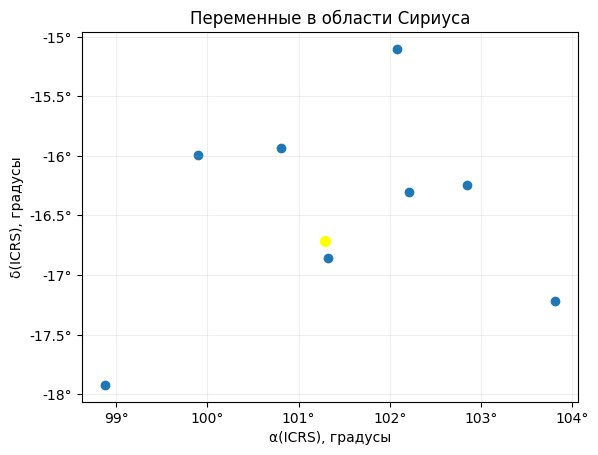

In [65]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support
quantity_support()

coo = coord.SkyCoord(result[0]['RAJ2000'], result[0]['DEJ2000'], frame='icrs', unit=(u.hourangle, u.deg)) # считываем согласно формату каталога
fig, ax = plt.subplots()
ax.scatter(coo.ra, coo.dec)
ax.scatter(alphaCMa.ra, alphaCMa.dec, c='yellow', s=50)
ax.grid(alpha=0.2)
ax.set_title("Переменные в области Сириуса")
ax.set_xlabel("α(ICRS), градусы")
ax.set_ylabel("δ(ICRS), градусы")

In [52]:
print(result[0]['Period']) # обратите внимание - колонка имеет специфический тип Column или MaskedColumn
print(type(result[0]['Period']))
print(result[0]['Period'].quantity) # таким методом можно перевести размерную величину в массив Quantity

     Period     
       d        
----------------
  199.7800000000
  422.5000000000
              --
  326.1000000000
              --
   10.6102000000
  163.4000000000
  271.3000000000
    2.2915010000
             ...
              --
  480.0000000000
  178.0000000000
  259.8000000000
  354.0000000000
   86.0000000000
   73.0000000000
    3.0135100000
    0.3205970000
    1.1616500000
Length = 24 rows
<class 'astropy.table.column.MaskedColumn'>
[1.997800e+02 4.225000e+02          nan 3.261000e+02          nan
 1.061020e+01 1.634000e+02 2.713000e+02 2.291501e+00 1.485000e+02
 1.234000e+02 4.310000e+02 1.500000e+01          nan          nan
 4.800000e+02 1.780000e+02 2.598000e+02 3.540000e+02 8.600000e+01
 7.300000e+01 3.013510e+00 3.205970e-01 1.161650e+00] d


In [54]:
result[0]['Period'].format = '.5f' # форматирование работает аналогично
print(result[0]['Period'])

  Period 
    d    
---------
199.78000
422.50000
       --
326.10000
       --
 10.61020
163.40000
271.30000
  2.29150
      ...
       --
480.00000
178.00000
259.80000
354.00000
 86.00000
 73.00000
  3.01351
  0.32060
  1.16165
Length = 24 rows


## Упражнения

### 0. Точка отсчета
- Создайте момент времени типа `astropy.time.Time` с датой вашего рождения и временем, соответствующим полуночи по UTC: например, `"10-04-1998 00:00:00"`, запишите его в переменную `b_time`.
- Создайте объект типа `EarthLocation` с местом вашего рождения , запишите его в переменную `b_loc`. (Геодезические широту и долготу места можно взять, например, из [maps.yandex.ru])
- Создайте объект типа `SkyCoord`, в который запишите координаты ICRS местного астрономического зенита в момент `b_time` в месте `b_loc`, запишите его в переменную `b_zenith`. Выведите координаты `b_zenith`.

### 1. Переменный зенит

- Найдите с помощью `Vizier.find_catalogs` международный каталог переменных звезд `VSX`.
- Загрузите из этого каталога с помощью `Vizier.query_region` все звезды в квадратной области 2°×2° с центром в `b_zenith` в таблицу `var_table`.
- С помощью `seaborn.countplot` постройте столбчатую диаграмму с количеством переменных звезд разных типов в таблице `var_table` (используйте метод `to_pandas`, чтобы преобразовать `Table` в `DataFrame`). Сделайте диаграмму эстетически красивой.
  
### 2. Астрометрический зенит
- Загрузите из оптического каталога Gaia DR3 `I/355/gaiadr3` круглую область радиусом 10' с центром в `b_zenith` из предыдущего задания в таблицу `gaia_table`.
- Выведите количество звезд в таблице `gaia_table`.
- Постройте ГР-диаграмму в виде диаграммы рассеяния в координатах `BP-RP` и `Gmag`. Сделайте её эстетически красивой. Не забудьте инвертировать ось звездной величины.
  
### 3. Инфракрасное небо
- Загрузите из инфракрасного каталога 2MASS `VII/233/xsc` *все звезды* со звездной величиной `J.ext` ярче 10 и запишите в таблицу `twomass_table` 
- Выведите количество звезд в таблице `twomass_table`
- Создайте две новых колонки с галактическими координатами (l, b) каждого источника.
- Постройте диаграмму рассеяния источников из `twomass_table` в галактических координатах. Сделайте её эстетически красивой. Добейтесь того, чтобы центр Галактики находился в центре диаграммы рассеяния.
- (вопрос на дополнительное изучение) Что вы можете сказать о ярких в инфракрасных лучах структурах?
